In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
import seaborn as sns
import os
import os.path as osp



In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.preprocessing import  LabelEncoder
import ast

In [12]:
df_gt = pd.read_csv('val.csv')


In [13]:
# df = pd.read_csv(osp.join('raw_test_results.csv'))
df = pd.read_csv('layer_outputs.csv')
# df_logits = df[[a for a in df.columns if 'logit' in a][:52]]


In [14]:
def fine2coarse(num):
    if 0 <= num <= 4:
        return 0
    elif 5 <= num <= 10:
        return 1
    elif 11 <= num <= 23:
        return 2
    elif 24 <= num <= 31:
        return 3
    elif 32 <= num <= 37:
        return 4
    elif 38 <= num <= 47:
        return 5
    elif 48 <= num <= 51:
        return 6
#     
COARSE_LABEL = {
    0: 'body',
    1: 'head',
    2: 'upper limb',
    3: 'lower limb',
    4: 'body-hand',
    5: 'head-hand',
    6: 'leg-hand'
}

FINE_LABEL = {
    0: "shaking body",
    1: "sitting straightly",
    2: "shrugging",
    3: "turning around",
    4: "rising up",
    5: "bowing head",
    6: "head up",
    7: "tilting head",
    8: "turning head",
    9: "nodding",
    10: "shaking head",
    11: "scratching arms",
    12: "playing objects",
    13: "putting hands together",
    14: "rubbing hands",
    15: "pointing oneself",
    16: "clenching fist",
    17: "stretching arms",
    18: "retracting arms",
    19: "waving",
    20: "spreading hands",
    21: "hands touching fingers",
    22: "other finger movements",
    23: "illustrative gestures",
    24: "shaking legs",
    25: "curling legs",
    26: "spread legs",
    27: "closing legs",
    28: "crossing legs",
    29: "stretching feet",
    30: "retracting feet",
    31: "tiptoe",
    32: "scratching or touching neck",
    33: "scratching or touching chest",
    34: "scratching or touching back",
    35: "scratching or touching shoulder",
    36: "arms akimbo",
    37: "crossing arms",
    38: "playing or tidying hair",
    39: "scratching or touching hindbrain",
    40: "scratching or touching forehead",
    41: "scratching or touching face",
    42: "rubbing eyes",
    43: "touching nose",
    44: "touching ears",
    45: "covering face",
    46: "covering mouth",
    47: "pushing glasses",
    48: "patting legs",
    49: "touching legs",
    50: "scratching legs",
    51: "scratching feet"
}


In [15]:
y_fine_str = df_gt['metadata'].apply(lambda x: FINE_LABEL[ast.literal_eval(x)['label']])
y_coarse_str = df_gt['metadata'].apply(lambda x: COARSE_LABEL[fine2coarse(ast.literal_eval(x)['label'])])


In [16]:
filter_data = True
if filter_data:
    selected_coarse_labels = ['body','head','upper limb','lower limb']
    mask = np.isin(y_coarse_str, selected_coarse_labels)
    
    # Applying the mask to the lists
    y_fine_str = [y_fine_str[i] for i in range(len(mask)) if mask[i] == 1]
    y_coarse_str = [y_coarse_str[i] for i in range(len(mask)) if mask[i] == 1]
    
    # Applying the mask to the DataFrame
    df = df[mask == 1]


In [17]:
# X = df_logits.values
# y = np.argmax(df_logits.values, axis=1)
# 
# 
# # y = [COARSE_LABEL[fine2coarse(a)] for a in y]
# y_str = [COARSE_LABEL[fine2coarse(a)] for a in y]
y_fine = LabelEncoder().fit_transform(y_fine_str)
y_coarse = LabelEncoder().fit_transform(y_coarse_str)


In [19]:
y_coarse_str

['head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'upper limb',
 'body',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'head',
 'he

In [18]:
X = df.values

In [29]:
df_data = pd.DataFrame(X.tolist())
df_data['labels_coarse'] = y_coarse_str
df_data['labels_fine'] = y_fine_str
# df_data.index.name = 'labels'
df_data.to_csv('human_micrgestures.csv', index=False)

In [26]:
os.getcwd()

'D:\\Project- Electro\\VAME\\materials'

In [190]:

X = StandardScaler().fit_transform(X)

umap_reducer = UMAP(n_components=2, n_neighbors=10, min_dist=0.0)
pca_reducer = PCA(n_components=2)

embedding_pca = pca_reducer.fit_transform(X)
# embedding_umap = umap_reducer.fit_transform(X,y_fine)
embedding_umap = umap_reducer.fit_transform(X)


In [191]:
df_embed = pd.DataFrame()
df_embed['labels_coarse'] = y_coarse_str
df_embed['labels_fine'] = y_fine_str
df_embed[['pca1','pca2']] = embedding_pca
df_embed[['umap1','umap2']] = embedding_umap

In [192]:

def plot_embeddings(df_in, var1, var2):
    # Group the dataframe by 'labels_coarse'
    df_g = df_in.groupby('labels_coarse')
    n_plots = len(df_g) + 1
    fig, axes = plt.subplots(n_plots,1, figsize=(10,5*n_plots))
    
    
    # Create the main scatter plot
    g_main = sns.scatterplot(ax=axes[0], data=df_in, x=var1, y=var2, hue='labels_coarse')
    g_main.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
    axes[0].set_title('coarse labels')
    # plt.show()
    
    # Capture the x and y limits from the main plot
    xlims = g_main.get_xlim()
    ylims = g_main.get_ylim()
    
    
    
    # Create scatter plots for each group with the same x and y limits and a title
    for ind, (label, df_e) in enumerate(df_g):
        g = sns.scatterplot(ax=axes[ind+1], data=df_e, x=var1, y=var2, hue='labels_fine')
        g.set_xlim(xlims)
        g.set_ylim(ylims)
        g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
        axes[ind+1].set_title(label)  # Set the title to the current label
    fig.suptitle(f'Embedding of {var1} and {var2}', y=0.9)
    plt.subplots_adjust(hspace=0.4)  # Adjust the horizontal space between plots if needed
    plt.show()
        

In [193]:
# plot_embeddings(df_in=df_embed, var1='pca1', var2='pca2')

In [194]:
# plot_embeddings(df_in=df_embed, var1='umap1', var2='umap2')

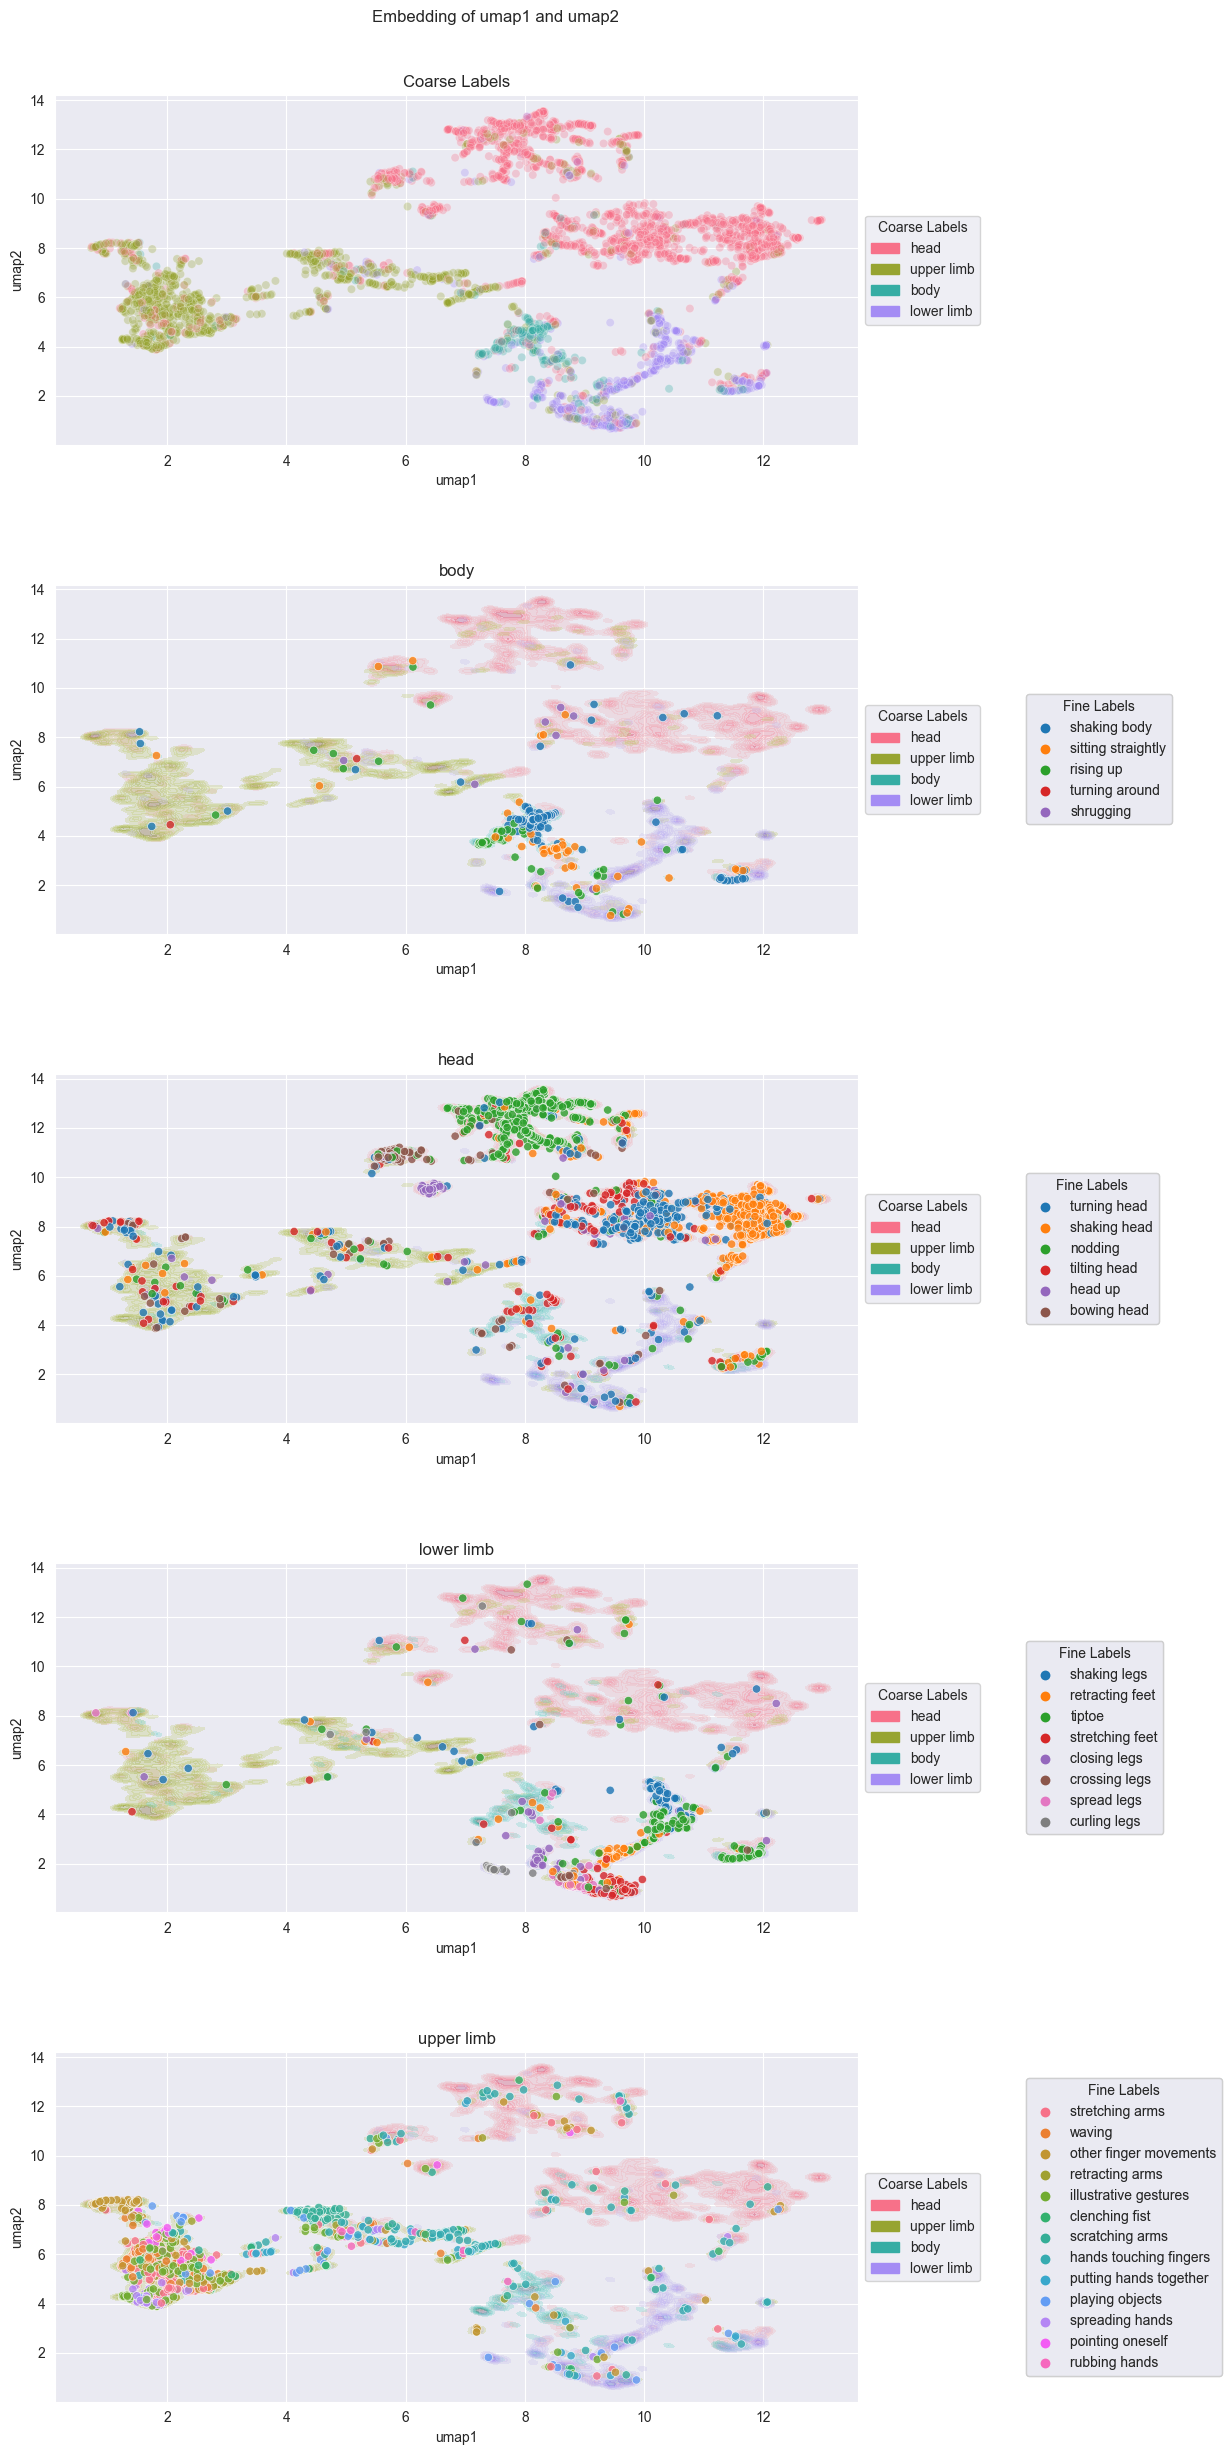

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def plot_embeddings_with_background(df_in, var1, var2):
    # Group the dataframe by 'labels_coarse'
    df_g = df_in.groupby('labels_coarse')
    n_plots = len(df_g) + 1
    fig, axes = plt.subplots(n_plots, 1, figsize=(10, 5 * n_plots))  # Adjust the figsize if needed

    # Get unique coarse labels and assign colors
    coarse_labels = df_in['labels_coarse'].unique()
    color_palette = sns.color_palette("husl", n_colors=len(coarse_labels))
    color_dict = dict(zip(coarse_labels, color_palette))

    # Create the KDE plot for the background
    g_main = sns.scatterplot(data=df_in, x=var1, y=var2, hue='labels_coarse', alpha=0.3, ax=axes[0], palette=color_dict)
    
    # Manually create the legend for the KDE plot
    handles_coarse = [mpatches.Patch(color=color_dict[label], label=label) for label in coarse_labels]
    axes[0].legend(handles=handles_coarse, title='Coarse Labels', loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
    axes[0].set_title('Coarse Labels')
    
    # Capture the x and y limits from the KDE plot
    xlims = g_main.get_xlim()
    ylims = g_main.get_ylim()

    # Create scatter plots for each group with the same x and y limits and a title
    for ind, (label, df_e) in enumerate(df_g):
        ax = axes[ind + 1]
        
        # Create the background KDE plot for each subplot
        g_kde = sns.kdeplot(data=df_in, x=var1, y=var2, hue='labels_coarse', fill=True, alpha=0.3, ax=ax, palette=color_dict, bw_adjust=0.1)
        
        # Overlay the scatter plot for the fine labels
        g = sns.scatterplot(ax=ax, data=df_e, x=var1, y=var2, hue='labels_fine',alpha=0.8)
        g.set_xlim(xlims)
        g.set_ylim(ylims)
        
        # Manually create the legends
        legend_coarse = ax.legend(handles=handles_coarse, title='Coarse Labels', loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
        ax.add_artist(legend_coarse)

        handles_fine, labels_fine = g.get_legend_handles_labels()
        legend_fine = ax.legend(handles=handles_fine, labels=labels_fine, title='Fine Labels', loc='center left', bbox_to_anchor=(1.2, 0.5), ncol=1)
        ax.add_artist(legend_fine)
        
        ax.set_title(label)  # Set the title to the current label

    # Adjust the spacing between subplots and the suptitle
    fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to fit suptitle
    fig.suptitle(f'Embedding of {var1} and {var2}', y=0.98)
    plt.subplots_adjust(hspace=0.4)  # Adjust the horizontal space between plots if needed

    plt.show()

# Example usage:
plot_embeddings_with_background(df_embed, 'umap1', 'umap2')

In [176]:
# var1 = 'umap1'
# var2 = 'umap2'
# df_in = df_embed
# g = sns.kdeplot(data=df_in, x=var1, y=var2, hue='labels_coarse', fill=True, alpha=0.3, legend=True)
# handles = g.get_legend()